In [1]:
#Data Structures
import pandas as pd
import numpy as np
import re
import os

### For installing missingno library, type this command in terminal
#pip install missingno

import missingno as msno

#Sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score

#Plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

#Others
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# New Section

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# View data dictionary
# data_dict.style

In [4]:
# # import data

# data = pd.read_csv("/content/drive/MyDrive/train 2.csv")
# unseen = pd.read_csv("/content/drive/MyDrive/test.csv")
# # data_dict = pd.read_csv("data_dictionary.csv")

# print(data.shape)
# print(unseen.shape)
# # print(data_dict.shape)

In [5]:
data = pd.read_csv("train.csv")
unseen = pd.read_csv("test.csv")
data_dict = pd.read_csv("data_dictionary.csv")

print(data.shape)
print(unseen.shape)
print(data_dict.shape)

(69999, 172)
(30000, 171)
(36, 2)


In [6]:
data.head(10)

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.00,0.00,0.00,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.00,0.00,0.00,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.00,0.00,0.00,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.00,0.00,0.00,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.00,0.00,0.00,0
5,5,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,86.193,83.351,...,0,0,NaN,NaN,NaN,698,0.00,0.00,0.00,0
6,6,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,54.173,95.130,...,0,0,NaN,NaN,NaN,1083,0.00,0.00,0.00,0
7,7,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,167.861,167.869,...,0,0,1.0,1.0,1.0,584,82.26,73.56,177.14,0
8,8,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,163.550,90.250,...,0,0,NaN,NaN,NaN,2455,0.00,0.00,0.00,1
9,9,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,101.984,259.265,...,0,0,NaN,NaN,NaN,2530,0.00,0.00,0.00,0


#### Drop unneeded columns

In [7]:
# drop dublicated rows
print ('before drop dublicates: ', data.shape)
data.drop_duplicates(inplace=True)
print ('after drop dublicates: ', data.shape)

before drop dublicates:  (69999, 172)


after drop dublicates:  (69999, 172)


In [8]:
# drop id column
data.drop(columns=['id'],inplace=True)

In [9]:
data.head(10)

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,...,0,0,NaN,NaN,NaN,1958,0.00,0.00,0.00,0
1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,...,0,0,NaN,1.0,NaN,710,0.00,0.00,0.00,0
2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,0.000,...,0,0,NaN,NaN,NaN,882,0.00,0.00,0.00,0
3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,111.095,...,0,0,NaN,NaN,NaN,982,0.00,0.00,0.00,0
4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,101.565,...,1,0,1.0,1.0,1.0,647,0.00,0.00,0.00,0
5,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,86.193,83.351,88.462,...,0,0,NaN,NaN,NaN,698,0.00,0.00,0.00,0
6,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,54.173,95.130,6.386,...,0,0,NaN,NaN,NaN,1083,0.00,0.00,0.00,0
7,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,167.861,167.869,167.866,...,0,0,1.0,1.0,1.0,584,82.26,73.56,177.14,0
8,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,163.550,90.250,51.726,...,0,0,NaN,NaN,NaN,2455,0.00,0.00,0.00,1
9,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,101.984,259.265,65.686,...,0,0,NaN,NaN,NaN,2530,0.00,0.00,0.00,0


#### Define custom info function

In [10]:
# display columns with the highest number of missing values

def more_info(dt):
    zeros_data = pd.DataFrame(dt.isin([0]).mean()*100)[dt.isin([0]).mean()*100>0].rename(columns={0:'zero values'})
    missing_data = pd.DataFrame(dt.isnull().mean()*100)[dt.isnull().mean()*100>0].rename(columns={0:'% missing values'})
    dtype_data = pd.DataFrame(dt.dtypes).rename(columns={0:'data type'})
    unique_data = pd.DataFrame(dt.nunique()).rename(columns={0:'uniques'})
    info_data = pd.concat([zeros_data, missing_data, dtype_data, unique_data], axis=1)
    return info_data

#### Analyze zero values

In [11]:
# view data info
display(more_info(data)[more_info(data)['zero values']>0].sort_values(by='zero values', ascending=False).head(20).style)

# # Drop columns with over 90% zero values
print ('Before dropping columns: ', data.shape)
data_info = more_info(data)
data.drop(columns=[i for i in data_info.index if data_info.loc[i,'zero values']> 90], inplace=True)
print ('After dropping columns: ', data.shape)

# review data info
display(more_info(data)[more_info(data)['zero values']>0].sort_values(by='zero values', ascending=False).head(20))

,zero values,% missing values,data type,uniques
loc_og_t2o_mou,98.997129,1.002871,float64,1
loc_ic_t2o_mou,98.997129,1.002871,float64,1
std_og_t2o_mou,98.997129,1.002871,float64,1
std_ic_t2o_mou_7,96.161374,3.838626,float64,1
std_og_t2c_mou_7,96.161374,3.838626,float64,1
std_ic_t2o_mou_6,96.045658,3.954342,float64,1
std_og_t2c_mou_6,96.045658,3.954342,float64,1
sachet_3g_7,95.859941,nan,int64,26
sachet_3g_6,95.841369,nan,int64,23
og_others_7,95.818512,3.838626,float64,148


Before dropping columns:  (69999, 171)
After dropping columns:  (69999, 148)


,zero values,% missing values,data type,uniques
churn_probability,89.811283,NaN,int64,2
sachet_2g_6,87.118387,NaN,int64,30
sachet_2g_7,86.682667,NaN,int64,33
sachet_2g_8,85.926942,NaN,int64,32
spl_ic_mou_7,85.521222,3.838626,float64,103
vol_3g_mb_6,85.439792,NaN,float64,9768
std_og_t2f_mou_7,85.371220,3.838626,float64,1991
jun_vbc_3g,84.922642,NaN,float64,9617
vol_3g_mb_7,84.621209,NaN,float64,10296
std_og_t2f_mou_6,84.401206,3.954342,float64,2074


#### Analyze missing values

In [12]:
# view data info
display(more_info(data)[more_info(data)['% missing values']>0].sort_values(by='% missing values', ascending=False).head(35))

# Drop columns with over 70% missing values
print ('Before dropping columns: ', data.shape)
data_info = more_info(data)
data.drop(columns=[i for i in data_info.index if data_info.loc[i,'% missing values']> 70], inplace=True)
print ('After dropping columns: ', data.shape)

# review data info
display(more_info(data)[more_info(data)['% missing values']>0].sort_values(by='% missing values', ascending=False).head(35))

,zero values,% missing values,data type,uniques
night_pck_user_6,24.463207,74.902499,float64,2
total_rech_data_6,NaN,74.902499,float64,36
count_rech_2g_6,5.921513,74.902499,float64,30
fb_user_6,2.100030,74.902499,float64,2
av_rech_amt_data_6,NaN,74.902499,float64,792
arpu_2g_6,6.585808,74.902499,float64,5389
date_of_last_rech_data_6,NaN,74.902499,object,30
count_rech_3g_6,15.743082,74.902499,float64,23
max_rech_data_6,NaN,74.902499,float64,47
arpu_3g_6,10.881584,74.902499,float64,5506


Before dropping columns:  (69999, 148)
After dropping columns:  (69999, 118)


,zero values,% missing values,data type,uniques
std_og_t2f_mou_8,83.968342,5.290076,float64,1945
std_ic_t2f_mou_8,74.172488,5.290076,float64,2583
spl_og_mou_8,48.152116,5.290076,float64,3848
std_ic_t2t_mou_8,53.669338,5.290076,float64,5367
loc_og_t2c_mou_8,73.483907,5.290076,float64,2204
spl_ic_mou_8,82.911184,5.290076,float64,95
std_og_t2t_mou_8,52.160745,5.290076,float64,14483
loc_og_t2f_mou_8,55.656509,5.290076,float64,3311
loc_ic_t2t_mou_8,11.484450,5.290076,float64,11446
loc_og_t2m_mou_8,9.200131,5.290076,float64,17616


#### Analyze unique values

In [13]:
# view data info
display(more_info(data)[more_info(data)['% missing values']>0].sort_values(by='uniques').head(15))

# Drop columns with ony 1 unique value
data_info = more_info(data)
print ('Before dropping columns: ', data.shape)
data.drop(columns=[i for i in data_info.index if data_info.loc[i,'uniques'] == 1], inplace=True)
print ('After dropping columns: ', data.shape)

# review data info
display(more_info(data)[more_info(data)['% missing values']>0].sort_values(by='uniques').head(15))

,zero values,% missing values,data type,uniques
last_date_of_month_8,NaN,1.047158,object,1
last_date_of_month_7,NaN,0.570008,object,1
date_of_last_rech_6,NaN,1.572880,object,30
date_of_last_rech_8,NaN,3.515765,object,31
date_of_last_rech_7,NaN,1.762882,object,31
spl_ic_mou_6,75.156788,3.954342,float64,78
spl_ic_mou_8,82.911184,5.290076,float64,95
spl_ic_mou_7,85.521222,3.838626,float64,103
og_others_6,79.091130,3.954342,float64,914
ic_others_6,73.836769,3.954342,float64,1523


Before dropping columns:  (69999, 118)
After dropping columns:  (69999, 114)


,zero values,% missing values,data type,uniques
date_of_last_rech_6,NaN,1.572880,object,30
date_of_last_rech_8,NaN,3.515765,object,31
date_of_last_rech_7,NaN,1.762882,object,31
spl_ic_mou_6,75.156788,3.954342,float64,78
spl_ic_mou_8,82.911184,5.290076,float64,95
spl_ic_mou_7,85.521222,3.838626,float64,103
og_others_6,79.091130,3.954342,float64,914
ic_others_6,73.836769,3.954342,float64,1523
ic_others_8,72.943899,5.290076,float64,1565
ic_others_7,76.786811,3.838626,float64,1658


#### Analyze object data type

In [14]:
data_info = more_info(data)

# preview all data types
display(data_info.groupby(by='data type').count())

# preview object data type
display(data_info[data_info['data type'] == 'object'])

# preview unique object values
object_cols = list(data_info[data_info['data type'] == 'object'].index)
object_data = data[object_cols]
object_uniq_vals = pd.DataFrame(pd.Series({i: object_data[i].unique() for i in object_data})).rename(columns={0:'unique values'})
display(object_uniq_vals.style)

# preview values from object data types
display(data[data_info[data_info['data type'] == 'object'].index].head())


,zero values,% missing values,uniques
data type,,,
int64,16,0,17
float64,94,76,94
object,0,3,3


,zero values,% missing values,data type,uniques
date_of_last_rech_6,NaN,1.572880,object,30
date_of_last_rech_7,NaN,1.762882,object,31
date_of_last_rech_8,NaN,3.515765,object,31


,unique values
date_of_last_rech_6,['6/22/2014' '6/12/2014' '6/11/2014' '6/15/2014' '6/25/2014' '6/30/2014' '6/29/2014' '6/20/2014' '6/28/2014' '6/27/2014' '6/26/2014' '6/19/2014' '6/23/2014' '6/24/2014' '6/14/2014' nan '6/5/2014' '6/8/2014' '6/6/2014' '6/16/2014' '6/13/2014' '6/18/2014' '6/21/2014' '6/17/2014' '6/10/2014' '6/7/2014' '6/2/2014' '6/1/2014' '6/3/2014' '6/9/2014' '6/4/2014']
date_of_last_rech_7,['7/10/2014' '7/22/2014' '7/21/2014' '7/26/2014' '7/27/2014' '7/19/2014' '7/30/2014' '7/16/2014' '7/31/2014' '7/20/2014' '7/25/2014' '7/29/2014' '7/28/2014' nan '7/7/2014' '7/18/2014' '7/13/2014' '7/17/2014' '7/12/2014' '7/24/2014' '7/15/2014' '7/1/2014' '7/23/2014' '7/9/2014' '7/8/2014' '7/14/2014' '7/5/2014' '7/4/2014' '7/11/2014' '7/6/2014' '7/2/2014' '7/3/2014']
date_of_last_rech_8,['8/24/2014' '8/26/2014' '8/25/2014' '8/30/2014' '8/28/2014' '8/19/2014' '8/5/2014' '8/27/2014' '8/16/2014' '8/21/2014' '8/22/2014' '8/23/2014' nan '8/15/2014' '8/31/2014' '8/12/2014' '8/10/2014' '8/29/2014' '8/20/2014' '8/13/2014' '8/18/2014' '8/11/2014' '8/14/2014' '8/6/2014' '8/9/2014' '8/8/2014' '8/17/2014' '8/7/2014' '8/1/2014' '8/4/2014' '8/2/2014' '8/3/2014']


,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
0,6/22/2014,7/10/2014,8/24/2014
1,6/12/2014,7/10/2014,8/26/2014
2,6/11/2014,7/22/2014,8/24/2014
3,6/15/2014,7/21/2014,8/25/2014
4,6/25/2014,7/26/2014,8/30/2014


<i> All of the object data types are date data from June, July, and August of 2014

In [15]:
# change object columns to datetime
data[object_cols] = data[object_cols].apply(pd.to_datetime)

# review object data after changing data type
print('object data after data type transform:')
display(more_info(data).loc[object_cols,:])
display(data[object_cols].head())

object data after data type transform:


,zero values,% missing values,data type,uniques
date_of_last_rech_6,NaN,1.572880,datetime64[ns],30
date_of_last_rech_7,NaN,1.762882,datetime64[ns],31
date_of_last_rech_8,NaN,3.515765,datetime64[ns],31


,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
0,2014-06-22,2014-07-10,2014-08-24
1,2014-06-12,2014-07-10,2014-08-26
2,2014-06-11,2014-07-22,2014-08-24
3,2014-06-15,2014-07-21,2014-08-25
4,2014-06-25,2014-07-26,2014-08-30


#### Imputation of missing values

- Most data contains zeros, therefore treat missing data as 0.
- Missing recharge dates indicate no recharge event.
- As a result, replace all missing data with 0 values.

In [16]:
data.replace({np.nan:0}, inplace=True)
print('Missing values after imputation:', more_info(data)['% missing values'].count())

Missing values after imputation: 0


In [17]:
data.shape

(69999, 114)

In [18]:
data.columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'vol_3g_mb_7', 'vol_3g_mb_8', 'sachet_2g_6', 'sachet_2g_7',
       'sachet_2g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'churn_probability'],
      dtype='object', length=114)

# Exploratory Data Analysis

Correlation

In [20]:
cor = data.corr()
cor.loc[:,:] = np.tril(cor, k=-1)
cor = cor.stack()
cor[(cor > 0.80) | (cor < -0.80)].sort_values()

TypeError: float() argument must be a string or a real number, not 'Timestamp'

In [21]:
# drop highly correlated columns

data_cp=data.copy()
data_cp.drop(['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8',
'std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8',
'total_og_mou_7','total_og_mou_8','total_og_mou_6',
'std_ic_mou_6','std_ic_mou_7','std_ic_mou_8',
'isd_ic_mou_6','isd_ic_mou_7','isd_ic_mou_8',
'loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8',
'std_og_t2m_mou_6','std_og_t2m_mou_7','std_og_t2m_mou_8',
'loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8',
'total_ic_mou_6','total_ic_mou_7','total_ic_mou_8',
'isd_ic_mou_6','isd_ic_mou_7','isd_ic_mou_7',
'loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8',
'loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8',
'loc_og_mou_6','loc_og_mou_7','loc_og_mou_8',
'loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8',
'sachet_2g_6','sachet_2g_7','sachet_2g_8',
'std_ic_t2t_mou_6','std_ic_t2t_mou_7','std_ic_t2t_mou_8'],axis=1,inplace=True)

In [22]:
# plotting the graph
plt.figure(figsize = (30,20))        # Size of the figure
sns.heatmap(data_cp.corr(),annot = True)

TypeError: float() argument must be a string or a real number, not 'Timestamp'

<Figure size 3000x2000 with 0 Axes>

In [23]:
data_cp.shape

(69999, 69)

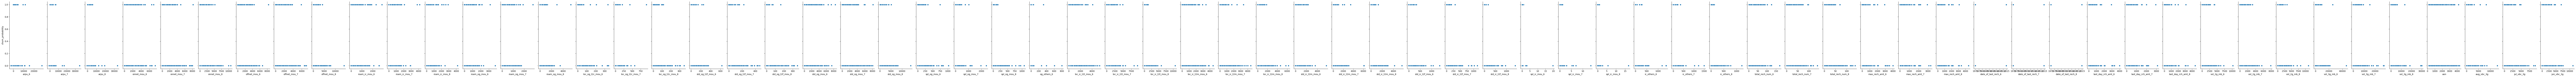

In [24]:
# relationship between churn probablity and other feature using scatter plot

sns.pairplot(data_cp, x_vars=data_cp.drop('churn_probability', axis=1).columns, y_vars='churn_probability', size=5, aspect=0.5,kind='scatter')

In [ ]:
X = data_cp.drop("churn_probability", axis = 1)
print(X)

        arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0       31.277   87.009    7.527        48.58       124.38         1.29   
1        0.000  122.787   42.953         0.00         0.00         0.00   
2       60.806  103.176    0.000         0.53        15.93         0.00   
3      156.362  205.260  111.095         7.26        16.01         0.00   
4      240.708  128.191  101.565        21.28         4.83         6.13   
...        ...      ...      ...          ...          ...          ...   
69994   15.760  410.924  329.136         0.00         7.36        10.93   
69995  160.083  289.129  265.772       116.54       196.46       232.63   
69996  372.088  258.374  279.782        77.13        68.44        78.44   
69997  238.575  245.414  145.062        14.01         7.64         6.71   
69998  168.269   42.815  167.961         0.00         0.00         0.00   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  ...  \
0             32.24         

In [ ]:

from sklearn.ensemble import IsolationForest
X = data_cp.drop("churn_probability", axis = 1)
y = data_cp.churn_probability
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, stratify = y)

Principal component analysis

In [ ]:
pca = PCA(svd_solver='randomized', random_state=100)
pca.fit(X_train)

TypeError: float() argument must be a string or a real number, not 'Timestamp'